In [6]:
# setup environment for ifarm
import os
import ROOT
import getpass
username = getpass.getuser()

home_dir = '/home/%s/eic/' % username
out_dir = '/volatile/halld/home/%s/eic/' % username

os.system('mkdir -p %s' % home_dir)
os.chdir(home_dir)
os.listdir()
os.system('git clone https://github.com/jrstevenjlab/eic_spect.git')

32768

fatal: destination path 'eic_spect' already exists and is not an empty directory.


In [7]:
from pyjano.jana import Jana
jana = Jana()

In [8]:
# set input and output directories, then check contents
input_dir = home_dir + 'eic_spect/lund_generated/'
input_name = '10_100' # Beam energies: 5_41, 5_100, 10_100, 18_275 
output_dir = out_dir + 'eic_spect/outTree/'
os.system('mkdir -p %s' % output_dir)
print(output_dir)

/volatile/halld/home/jrsteven/eic/eic_spect/outTree/


In [9]:
!ls {input_dir}

zc_10_100.txt  zc_18_275.txt  zc_5_100.txt  zc_5_41.txt


In [10]:
!ls {output_dir}

## Create ROOT TTrees from with smearing of all detectors

In [ ]:
# loop over detectors and make smeard files
detectors = ['jleic', 'beast', 'ephenix']

for detector_name in detectors:
    Jana().plugin('lund_reader')\
          .plugin('event_writer')\
          .plugin('eic_smear', detector=detector_name)\
          .plugin('jana', nevents=5000, output='%s/zc_sm%s_%s.root' % (output_dir,detector_name,input_name))\
          .source('%s/zc_%s.txt' % (input_dir,input_name))\
          .run()

## Plot momentum resolution (where you can choose the detector)

In [12]:
# Open root file to test output
detector = "beast"
file = ROOT.TFile('%s/zc_sm%s_10_100.root' % (output_dir,detector))

PSmearVsPOrig = ROOT.TH2D('PSmearVsPOrig', '; p_{orig} (GeV); p_{smear} (GeV)', 100, 0, 25, 100, 0, 25)
DeltaPOverP = ROOT.TH1D('DeltaPOverP', '; #Delta p/p', 100, -0.1, 0.1)
ele_only = ROOT.TCut('pdg==11') # e-
pion_only = ROOT.TCut('pdg==211') # pi+

# Reading a tree from the file
tree = file.Get('events').Get('tree')

# Filling the histograms from the tree
canvas = ROOT.TCanvas('canvas', 'canvas',600,400)

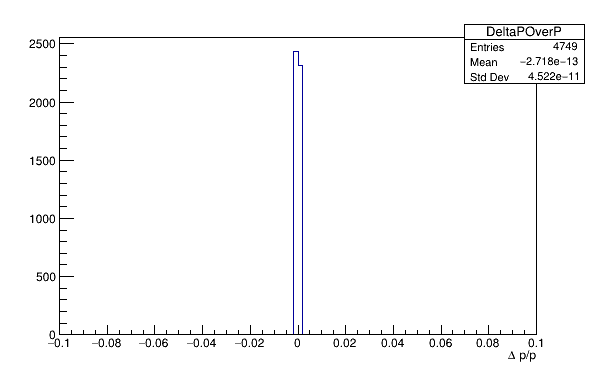

In [13]:
# e- smearing
#tree.Draw('p:smear_orig_p >> PSmearVsPOrig', ele_only)
tree.Draw('(p-smear_orig_p)/p >> DeltaPOverP', ele_only)
DeltaPOverP.Draw()
canvas.Draw()

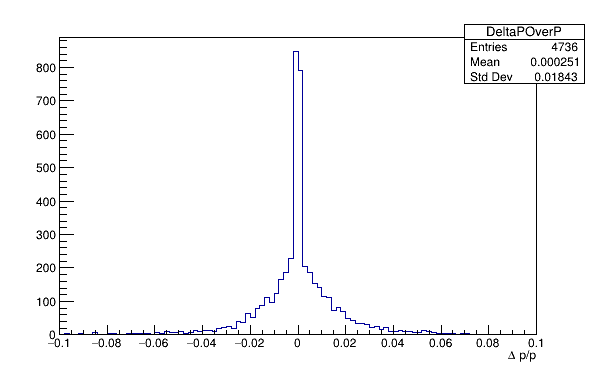

In [14]:
# pi+ smearing
tree.Draw('p:smear_orig_p >> PSmearVsPOrig', pion_only)
tree.Draw('(p-smear_orig_p)/p >> DeltaPOverP', pion_only)
DeltaPOverP.Draw()
canvas.Draw()